# Credit Card Fraud Detection::

Download dataset from this link:

https://www.kaggle.com/mlg-ulb/creditcardfraud

# Description about dataset::

The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. 


### Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

# WORKFLOW :

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Standardized the Input Variables. 

4.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

5.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

6.Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)

7.Train the Model with Epochs (100).

8.If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .

9.Prediction should be > 92%
10.Evaluation Step
11Prediction


# Task::

## Identify fraudulent credit card transactions.

In [2]:
import pandas as pd
import numpy as np
# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.optimizers import Adam, SGD
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
import io
#i tried my best but am only able to make upload file work all other ways were not working on google colab
from google.colab import files
uploaded = files.upload()

Saving creditcard.csv to creditcard.csv


In [63]:
data_to_train = pd.read_csv(io.BytesIO(uploaded['creditcard.csv']))

data_to_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [64]:
data_to_train.isnull().sum()
#no Missing value so we are not filling anything

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [65]:
data_to_train.shape

(284807, 31)

In [66]:
data_to_train.shape

x = (data_to_train.iloc[:, :-1].values)
y = (data_to_train.iloc[:, -1].values)
train_ratio = 0.5
validation_ratio = 0.20
test_ratio = 0.30
from sklearn.model_selection import train_test_split
# train is now 50% of the entire data set
# the _junk suffix means that we drop that variable completely
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1 - train_ratio)

x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio))

print("train")
print(x_train)
print("test")
print(x_test)
print("validation")
print( x_val )

train
[[154757.         0.311     -0.43  ...      0.261      0.287     25.   ]
 [ 46295.         1.568     -1.067 ...      0.028     -0.002     24.   ]
 [126549.         2.064     -0.972 ...     -0.074     -0.058    102.   ]
 ...
 [ 71564.        -1.601      0.364 ...     -0.081     -0.114     52.81 ]
 [ 53632.        -0.708      2.824 ...     -0.048     -0.039      1.   ]
 [150730.        -0.189      0.784 ...     -0.605     -0.486      1.   ]]
test
[[141606.        -7.772      7.14  ...      2.911      1.786      0.77 ]
 [  1508.         1.27       0.192 ...     -0.011     -0.006      1.98 ]
 [ 71884.         1.144      0.246 ...     -0.005      0.021     23.43 ]
 ...
 [128749.        -0.218      0.913 ...      0.355      0.138     13.99 ]
 [ 63424.        -0.768      0.213 ...      0.305      0.222      8.96 ]
 [120530.         2.011      0.161 ...     -0.006     -0.025     26.9  ]]
validation
[[  7595.         1.189      0.33  ...      0.004      0.027     36.   ]
 [143622.        

In [67]:
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

(142403, 30)
(85443, 30)
(56961, 30)


In [68]:
# Normalizing the data

mean = x_train.mean(axis=0)
x_train -= mean

std = x_train.std(axis=0)

x_train /= std
x_test -= mean
x_test /= std

In [69]:
from tensorflow.keras import models
from tensorflow.keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(10, activation='relu',
                          input_shape =(30,)))
    model.add(layers.Dense(8, activation='relu'))
    model.add(layers.Dense(6, activation='relu'))
    model.add(layers.Dense(1,activation='sigmoid'))
    model.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])
    return model
model=build_model()    

In [78]:
history=model.fit(x_train,y_train,epochs=100,validation_data=(x_val, y_val),batch_size=100)

Epoch 1/100
1425/1425 [==============================] - 2s 2ms/step - loss: 8.2855e-04 - accuracy: 0.9997 - val_loss: 579.8110 - val_accuracy: 0.9981
Epoch 2/100
1425/1425 [==============================] - 2s 1ms/step - loss: 5.6765e-04 - accuracy: 0.9997 - val_loss: 568.7776 - val_accuracy: 0.9981
Epoch 3/100
1425/1425 [==============================] - 2s 1ms/step - loss: 5.6301e-04 - accuracy: 0.9997 - val_loss: 667.2758 - val_accuracy: 0.9981
Epoch 4/100
1425/1425 [==============================] - 2s 1ms/step - loss: 6.4045e-04 - accuracy: 0.9997 - val_loss: 613.5262 - val_accuracy: 0.9981
Epoch 5/100
1425/1425 [==============================] - 2s 1ms/step - loss: 6.1447e-04 - accuracy: 0.9997 - val_loss: 607.7067 - val_accuracy: 0.9981
Epoch 6/100
1425/1425 [==============================] - 2s 1ms/step - loss: 5.3131e-04 - accuracy: 0.9997 - val_loss: 582.5870 - val_accuracy: 0.9981
Epoch 7/100
1425/1425 [==============================] - 2s 1ms/step - loss: 5.1907e-04 - accu

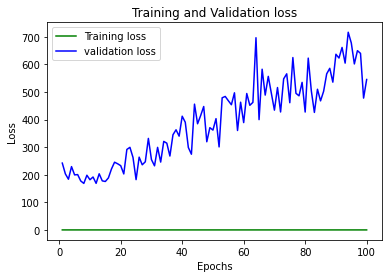

In [71]:
#evaluation and prediction
#Visualizing Training and Validation Loss
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

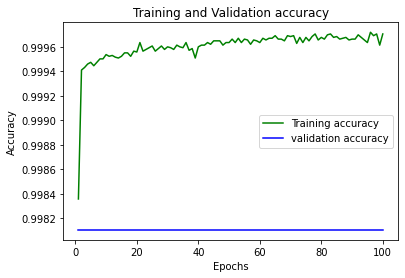

In [74]:
#Visualizing Training and Validation Accuracy
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [79]:
# evaluate the model
scores = model.evaluate(x_train, y_train)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
# evaluate the model
scores = model.evaluate(x_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

4451/4451 [==============================] - 4s 864us/step - loss: 2.9975e-04 - accuracy: 0.9999
accuracy: 99.99%
2671/2671 [==============================] - 2s 863us/step - loss: 0.0355 - accuracy: 0.9990
accuracy: 99.90%


In [77]:
#perdiction
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5) 
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("accuracy score")
print(accuracy_score(y_test, y_pred))
#[[85234    43]
 #[   39   127]]
#accuracy score 99% with adam optimizer
#0.9990402958697612

[[85234    43]
 [   39   127]]
accuracy score
0.9990402958697612
